In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt
from tensorflow.keras.optimizers import RMSprop


import cv2
import os

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization



from sklearn.metrics import mean_squared_error

In [3]:
Y=np.zeros((847,2))

for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  Y[i,:]=my_data

In [4]:
X_Dat=[]
x=0

for i in range(847):
  x=x+1  
  image = cv2.imread("C:/Users/dianu/Downloads/SM_I/SM_I"+str(i+1)+".png")# My reference Image
  X_Dat.append(image[60:288-60,204:432-60,:])

X_datnew=np.asarray(X_Dat)

Text(0.5, 1.0, 'Cropped Spectrogram of SM Power Signal')

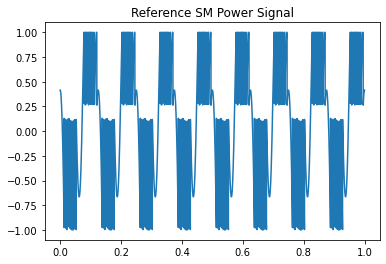

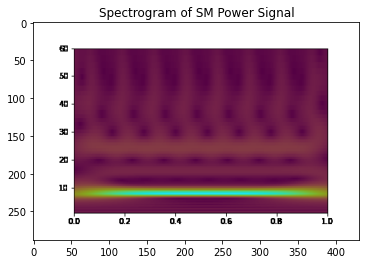

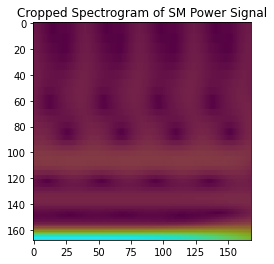

In [5]:
# Showing transformation of 1D signal to 2D signal for the sake of 2D CNN architecture input
import matplotlib.pyplot as plt

ref_input=my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(846+1)+".csv", delimiter=',')
t= np.linspace(0, 1, 8000)

fig, ax = plt.subplots()
ax.plot(t, ref_input)
ax.set_title('Reference SM Power Signal')

fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title('Spectrogram of SM Power Signal')

fig, ax = plt.subplots()
ax.imshow(X_Dat[846])
ax.set_title('Cropped Spectrogram of SM Power Signal')

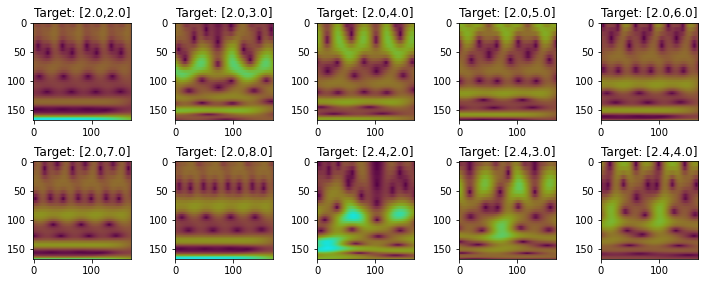

In [10]:
# Display of sample dataset
num_row = 2
num_col = 5
num=num_row*num_col
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_Dat[i], cmap='gray')
    ax.set_title("Target: ["+str(Y[i,0])+","+str(Y[i,1])+"]")
plt.tight_layout()
plt.show()

In [5]:
from sklearn.utils import shuffle

X, Y = shuffle(X_datnew, Y)

In [6]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, :, :,:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid,:, :,:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:,:, :,:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 168, 168, 3) (592, 2)
(170, 168, 168, 3) (170, 2)
(85, 168, 168, 3) (85, 2)


In [7]:

AlexNet = Sequential()


AlexNet.add(Conv2D(filters=96, input_shape=(168,168,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))


AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))


AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


AlexNet.add(Flatten())

AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(10))
AlexNet.add(Dense(2))


AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 42, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 42, 42, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 256)       0

In [8]:

AlexNet.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])

history=AlexNet.fit(X_train, y_train, epochs=300,
                    validation_data=(X_valid, y_valid))

Epoch 1/300
19/19 [==============================] - 30s 225ms/step - loss: 20.1776 - acc: 0.5723 - val_loss: 26727732.0000 - val_acc: 0.6412
Epoch 2/300
19/19 [==============================] - 2s 124ms/step - loss: 3.7696 - acc: 0.5724 - val_loss: 14930.7812 - val_acc: 0.6588
Epoch 3/300
19/19 [==============================] - 2s 125ms/step - loss: 2.9498 - acc: 0.6755 - val_loss: 7793.0947 - val_acc: 0.3588
Epoch 4/300
19/19 [==============================] - 2s 125ms/step - loss: 2.4840 - acc: 0.7519 - val_loss: 8421.7812 - val_acc: 0.6412
Epoch 5/300
19/19 [==============================] - 2s 125ms/step - loss: 2.8983 - acc: 0.7065 - val_loss: 3509.4578 - val_acc: 0.6412
Epoch 6/300
19/19 [==============================] - 2s 125ms/step - loss: 2.5470 - acc: 0.6988 - val_loss: 123.2472 - val_acc: 0.6412
Epoch 7/300
19/19 [==============================] - 2s 125ms/step - loss: 1.9438 - acc: 0.7277 - val_loss: 12.1116 - val_acc: 0.5824
Epoch 8/300
19/19 [=========================

Epoch 62/300
19/19 [==============================] - 2s 125ms/step - loss: 0.3332 - acc: 0.9427 - val_loss: 0.2385 - val_acc: 0.9235
Epoch 63/300
19/19 [==============================] - 2s 124ms/step - loss: 0.3208 - acc: 0.9455 - val_loss: 0.4841 - val_acc: 0.8706
Epoch 64/300
19/19 [==============================] - 2s 125ms/step - loss: 0.2909 - acc: 0.9088 - val_loss: 0.3588 - val_acc: 0.8353
Epoch 65/300
19/19 [==============================] - 2s 124ms/step - loss: 0.3375 - acc: 0.8670 - val_loss: 0.4685 - val_acc: 0.9235
Epoch 66/300
19/19 [==============================] - 2s 124ms/step - loss: 0.3290 - acc: 0.9285 - val_loss: 0.5823 - val_acc: 0.9588
Epoch 67/300
19/19 [==============================] - 2s 124ms/step - loss: 0.2543 - acc: 0.9253 - val_loss: 0.3134 - val_acc: 0.9235
Epoch 68/300
19/19 [==============================] - 2s 125ms/step - loss: 0.2503 - acc: 0.9376 - val_loss: 0.3146 - val_acc: 0.9235
Epoch 69/300
19/19 [==============================] - 2s 124ms

Epoch 181/300
19/19 [==============================] - 2s 125ms/step - loss: 0.1810 - acc: 0.9348 - val_loss: 0.2960 - val_acc: 0.9353
Epoch 182/300
19/19 [==============================] - 2s 125ms/step - loss: 0.2004 - acc: 0.9411 - val_loss: 0.2040 - val_acc: 0.9118
Epoch 183/300
19/19 [==============================] - 2s 124ms/step - loss: 0.2338 - acc: 0.9289 - val_loss: 0.2324 - val_acc: 0.9824
Epoch 184/300
19/19 [==============================] - ETA: 0s - loss: 0.1598 - acc: 0.940 - 2s 124ms/step - loss: 0.1614 - acc: 0.9408 - val_loss: 0.2580 - val_acc: 0.9471
Epoch 185/300
19/19 [==============================] - 2s 125ms/step - loss: 0.1884 - acc: 0.9260 - val_loss: 0.1973 - val_acc: 0.9529
Epoch 186/300
19/19 [==============================] - 2s 125ms/step - loss: 0.1811 - acc: 0.9176 - val_loss: 0.2362 - val_acc: 0.9176
Epoch 187/300
19/19 [==============================] - 2s 124ms/step - loss: 0.2024 - acc: 0.9201 - val_loss: 0.2184 - val_acc: 0.9588
Epoch 188/300
19/

19/19 [==============================] - 2s 124ms/step - loss: 0.1417 - acc: 0.9666 - val_loss: 0.2006 - val_acc: 0.9706


Text(0.5, 1.0, 'Training and validation loss')

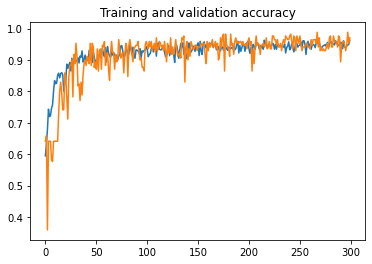

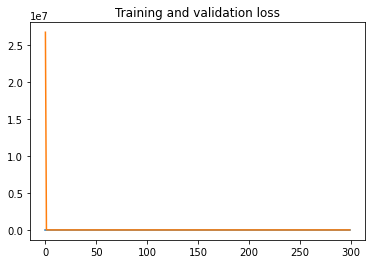

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [10]:
y_predictim=AlexNet.predict(X_test)

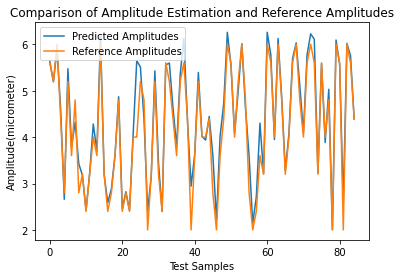

In [11]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

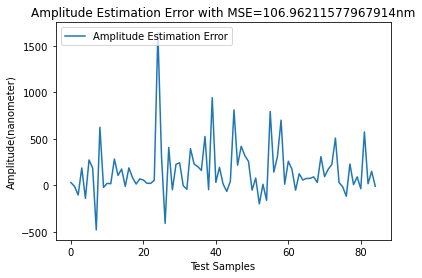

In [12]:
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

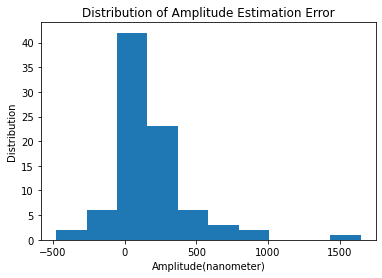

In [13]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

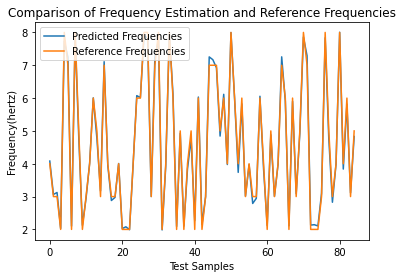

In [14]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

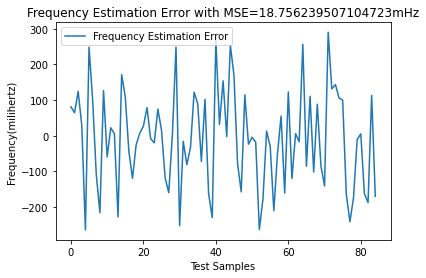

In [15]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

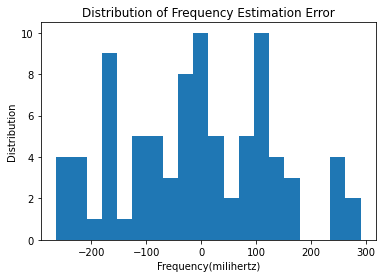

In [16]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()
